# <h1><center>Gift Wonder -- Data Wrangling</center></h1>

### <center>Hio Wa Mak<center>

### <center>01/04/2025<center>

## Import packages

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#check current directory
#os.getcwd()

## Read in the data

In [3]:
# Read in data from a csv file
retail2010 = pd.read_csv('../raw_data/online_retail_2009_2010.csv', encoding='latin1')
retail2011 = pd.read_csv('../raw_data/online_retail_2010_2011.csv', encoding='latin1')

## Examine details about the dataset

In [4]:
#Examine info on this dataset
retail2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [5]:
print(retail2010.head())
print(retail2010.tail())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom  
3  12/1/2009 7:45   2.10      13085.0  United Kingdom  
4  12/1/2009 7:45   1.25      13085.0  United Kingdom  
       Invoice StockCode                         Description  Quantity  \
525456  538171     22271                FELTCRAFT DOLL ROSIE         2   
525457  538171     22750        FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22

In [6]:
#Examine info on this dataset
retail2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
print(retail2011.head())
print(retail2011.tail())

  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2010 8:26   2.55      17850.0  United Kingdom  
1  12/1/2010 8:26   3.39      17850.0  United Kingdom  
2  12/1/2010 8:26   2.75      17850.0  United Kingdom  
3  12/1/2010 8:26   3.39      17850.0  United Kingdom  
4  12/1/2010 8:26   3.39      17850.0  United Kingdom  
       Invoice StockCode                      Description  Quantity  \
541905  581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255  CHIL

It appears that there are duplicated records based on InvoiceDate. Further investigation indicates that the tail records from 12/1/2010 to 12/9/2010 in retail2010 duplicates with the head records in retail2011. Let's remove the duplicates in the retail2010 datasets.

### Remove Duplicated Records

In [8]:
retail2010_noduplicates = retail2010[~retail2010['InvoiceDate'].str.match(r'12/\d+/2010')]
retail2010_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502938 entries, 0 to 502937
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      502938 non-null  object 
 1   StockCode    502938 non-null  object 
 2   Description  500117 non-null  object 
 3   Quantity     502938 non-null  int64  
 4   InvoiceDate  502938 non-null  object 
 5   Price        502938 non-null  float64
 6   Customer ID  402731 non-null  float64
 7   Country      502938 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.5+ MB


## Joining Data

In [9]:
#Combine the two datasets (2010 and 2011 data)
gift_df = pd.concat([retail2010_noduplicates, retail2011], ignore_index=True)
gift_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1044844,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1044845,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1044846,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


## Codebook

**InvoiceNo:** Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 

**StockCode:** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 

**Description:** Product (item) name. Nominal. 

**Quantity:** The quantities of each product (item) per transaction. Numeric.

**InvoiceDate:** Invice date and time. Numeric. The day and time when a transaction was generated. 

**UnitPrice:** Unit price. Numeric. Product price per unit in sterling (Â£). 

**CustomerID:** Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. 

**Country:** Country name. Nominal. The name of the country where a customer resides.

## The Gift Wonder Dataset

In [10]:
#Number of columns and observations
gift_df.shape

(1044848, 8)

In [11]:
#Look at the first few observations to get an idea
gift_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [12]:
#Rename variable names
gift_df.rename(columns={'Customer ID': 'CustomerID'}, inplace=True)
gift_df.rename(columns={'InvoiceDate': 'InvoiceDateTime'}, inplace=True)
gift_df.rename(columns={'Price': 'UnitPrice'}, inplace=True)

### Examine missing data

#### Number of missing values by variables

In [13]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([gift_df.isnull().sum(), 100 * gift_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
CustomerID,235287,22.518778
Description,4275,0.409150
Invoice,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDateTime,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


There are 23% of missing data in CustomerID. This column is essential for doing customer segmentation. Therefore, I will remove rows with missing CustomerID.

#### Drop rows with missing data

In [14]:
#Drop rows of missing data on CustomerID
missing_CustomerID = gift_df['CustomerID'].isnull()
gift_data = gift_df[~missing_CustomerID]
gift_data.shape

(809561, 8)

In [15]:
#Examine missing data again
missing = pd.concat([gift_data.isnull().sum(), 100 * gift_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
Invoice,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDateTime,0,0.0
UnitPrice,0,0.0
CustomerID,0,0.0
Country,0,0.0


There are no more missing data in this dataset.

### Descriptive Statistics

In [16]:
gift_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809561 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Invoice          809561 non-null  object 
 1   StockCode        809561 non-null  object 
 2   Description      809561 non-null  object 
 3   Quantity         809561 non-null  int64  
 4   InvoiceDateTime  809561 non-null  object 
 5   UnitPrice        809561 non-null  float64
 6   CustomerID       809561 non-null  float64
 7   Country          809561 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 55.6+ MB


In [17]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,809561.0,12.460672,190.301161,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,809561.0,3.685980,70.876558,0.0,1.25,1.95,3.75,38970.0
CustomerID,809561.0,15319.760422,1695.812057,12346.0,13969.00,15248.00,16792.00,18287.0


#### Examine rows with negative quantity

In [18]:
neg_quantity = gift_data[gift_data['Quantity'] <= 0]
print(len(neg_quantity))
neg_quantity = neg_quantity.sort_values(by='Quantity', ascending=False)
neg_quantity.head(20)

18446


,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
485003,C534757,22580,ADVENT CALENDAR GINGHAM SACK,-1,11/24/2010 10:07,4.95,16133.0,United Kingdom
391107,C527025,22865,HAND WARMER OWL DESIGN,-1,10/14/2010 11:59,2.10,12853.0,United Kingdom
829792,C565597,22666,RECIPE BOX PANTRY YELLOW DESIGN,-1,9/5/2011 14:29,2.95,12709.0,Germany
829791,C565597,22980,PANTRY SCRUBBING BRUSH,-1,9/5/2011 14:29,1.65,12709.0,Germany
827953,C565428,M,Manual,-1,9/4/2011 12:53,4.25,12867.0,United Kingdom
827952,C565428,79190B,RETRO PLASTIC POLKA TRAY,-1,9/4/2011 12:53,0.42,12867.0,United Kingdom
827950,C565428,22230,JIGSAW TREE WITH WATERING CAN,-1,9/4/2011 12:53,0.78,12867.0,United Kingdom
827842,C565422,22776,SWEETHEART 3 TIER CAKE STAND,-1,9/4/2011 12:15,9.95,17774.0,United Kingdom
827070,C565390,D,Discount,-1,9/2/2011 16:23,110.43,13408.0,United Kingdom
826941,C565382,CRUK,CRUK Commission,-1,9/2/2011 15:45,13.01,14096.0,United Kingdom


In [19]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,809561.0,12.460672,190.301161,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,809561.0,3.685980,70.876558,0.0,1.25,1.95,3.75,38970.0
CustomerID,809561.0,15319.760422,1695.812057,12346.0,13969.00,15248.00,16792.00,18287.0


#### Drop rows with negative quantity

In [20]:
#### Drop rows with negative quantity
negquant = gift_data['Quantity'] <= 0
gift_data = gift_data[~negquant]
gift_data.shape

(791115, 8)

#### Examine rows with zero unit price

In [21]:
zero_price = gift_data[gift_data['UnitPrice'] == 0]
print(len(zero_price))
zero_price.head(20)

70


,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,12/2/2009 13:34,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,12/3/2009 11:19,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,12/7/2009 16:38,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,12/8/2009 15:25,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,12/8/2009 15:25,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,12/15/2009 13:49,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,12/18/2009 14:22,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,1/6/2010 14:54,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,1/8/2010 10:43,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,1/15/2010 12:43,0.0,16858.0,United Kingdom


#### Drop rows with zero unit price

In [22]:
#### Drop rows with zero unit price
zeroprice = gift_data['UnitPrice'] == 0
gift_data = gift_data[~zeroprice]
gift_data.shape

(791045, 8)

In [23]:
#Descriptive statistics of numeric variables
gift_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,791045.0,13.334006,144.797886,1.000,2.00,5.00,12.00,80995.0
UnitPrice,791045.0,3.208401,29.458890,0.001,1.25,1.95,3.75,10953.5
CustomerID,791045.0,15327.095703,1695.028222,12346.000,13979.00,15259.00,16797.00,18287.0


In [24]:
# Convert CustomerID from float64 to int
gift_data = gift_data.copy()
gift_data['CustomerID'] = gift_data['CustomerID'].astype(int)

In [25]:
# Examine dataset info
gift_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791045 entries, 0 to 1044847
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Invoice          791045 non-null  object 
 1   StockCode        791045 non-null  object 
 2   Description      791045 non-null  object 
 3   Quantity         791045 non-null  int64  
 4   InvoiceDateTime  791045 non-null  object 
 5   UnitPrice        791045 non-null  float64
 6   CustomerID       791045 non-null  int32  
 7   Country          791045 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 51.3+ MB


In [26]:
# Look at the first few rows
gift_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085,United Kingdom


In [27]:
# Make a copy of the dataset
giftdata = gift_data.copy()

### Distributions

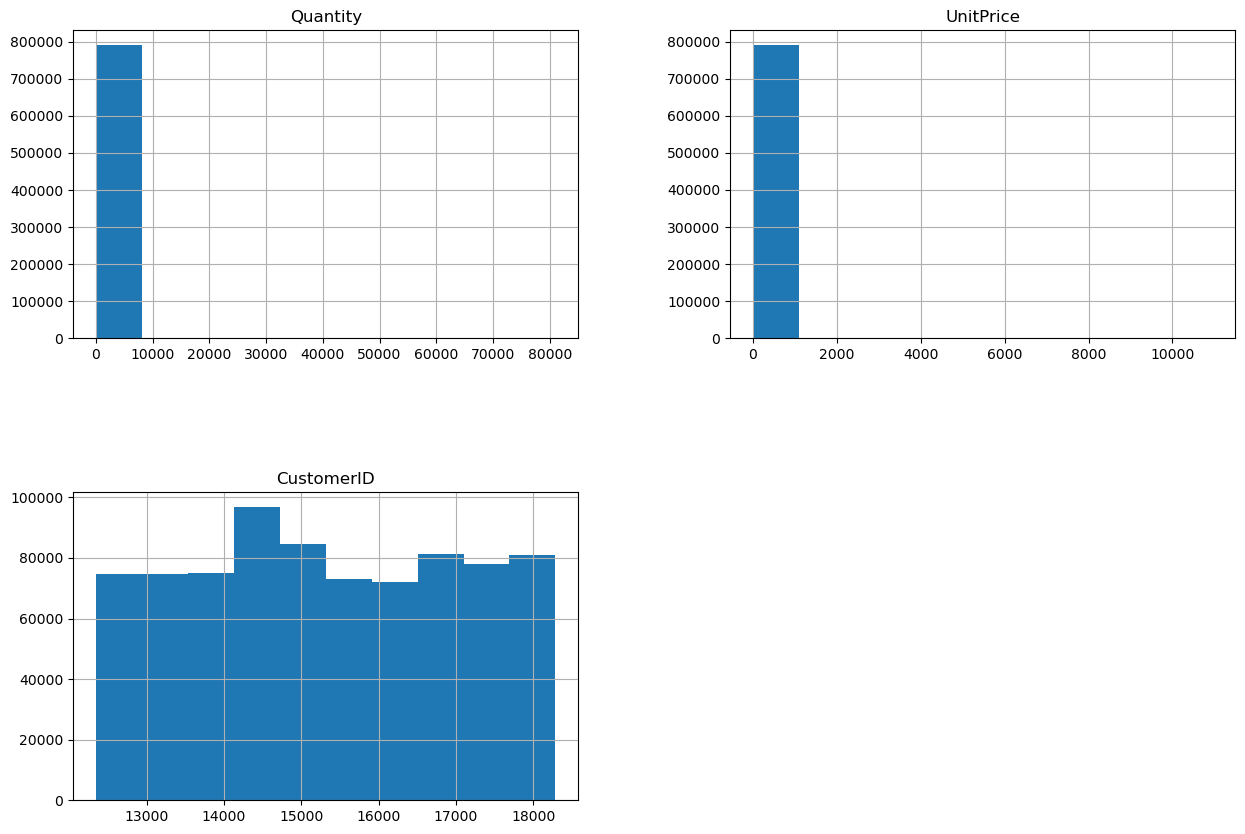

In [28]:
giftdata.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### Examine outliers

In [29]:
#Quantity outliers
quantoutliers = giftdata[giftdata['Quantity'] > 10000]
quantoutliers = quantoutliers.sort_values(by='Quantity', ascending=False)
quantoutliers.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
1043359,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446,United Kingdom
564557,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2/15/2010 11:57,0.10,13902,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,3/17/2010 13:09,0.10,13902,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,3/17/2010 13:09,0.10,13902,Denmark
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,3/17/2010 13:09,0.10,13902,Denmark
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,3/17/2010 13:09,0.10,13902,Denmark


In [30]:
#Unit Price outliers
priceoutliers = giftdata[giftdata['UnitPrice'] > 2000]
priceoutliers = priceoutliers.sort_values(by='UnitPrice', ascending=False)
priceoutliers.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
135013,502263,M,Manual,1,3/23/2010 15:22,10953.50,12918,United Kingdom
358639,524159,M,Manual,1,9/27/2010 16:12,10468.80,14063,United Kingdom
74356,496115,M,Manual,1,1/29/2010 11:04,8985.60,17949,United Kingdom
676320,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029,United Kingdom
129903,501766,M,Manual,1,3/19/2010 11:35,6958.17,15760,Norway
129987,501768,M,Manual,1,3/19/2010 11:45,6958.17,15760,Norway
925312,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536,France
925315,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536,France
909344,571751,M,Manual,1,10/19/2011 11:18,3949.32,12744,Singapore
288706,517483,M,Manual,1,7/29/2010 12:29,3610.50,12737,France


Since there is no reason to believe these transactions are invalid or a result of errors, let's keep them in the dataset.

In [31]:
# Descriptive statistics for categorical variable - Country
giftdata['Country'].value_counts()

Country
United Kingdom          711882
Germany                  16456
EIRE                     15579
France                   13544
Netherlands               5086
Spain                     3674
Belgium                   3056
Switzerland               3005
Portugal                  2366
Australia                 1790
Channel Islands           1552
Italy                     1444
Sweden                    1319
Norway                    1289
Cyprus                    1155
Finland                   1032
Austria                    922
Denmark                    778
Greece                     657
Unspecified                521
Poland                     504
Japan                      468
USA                        409
United Arab Emirates       383
Singapore                  339
Israel                     322
Malta                      282
Canada                     228
Iceland                    222
Lithuania                  154
RSA                        122
Brazil                      94


### Feature engineering: Create additional variables for analysis

In [32]:
#Split the InvoiceDate variable into InvoiceDate and InvoiceTime
giftdata[['InvoiceDate', 'InvoiceTime']] = giftdata['InvoiceDateTime'].str.split(' ', expand=True)  # Split into two columns
giftdata['InvoiceDate'] = pd.to_datetime(giftdata['InvoiceDate'], format='%m/%d/%Y')    # Convert 'InvoiceDate' to datetime
giftdata['InvoiceTime'] = pd.to_datetime(giftdata['InvoiceTime'], format='%H:%M').dt.time    # Convert 'Time' to time object

#Drop the InvoiceDateTime column
giftdata = giftdata.drop(columns=['InvoiceDateTime'])

#Continue to split the InvoiceDate variable into Year, Month, and Day
giftdata['InvoiceYear'] = giftdata['InvoiceDate'].dt.year
giftdata['InvoiceMonth'] = giftdata['InvoiceDate'].dt.month
giftdata['InvoiceDay'] = giftdata['InvoiceDate'].dt.day

# Create a new column InvoiceYearMonth in 'YYYYMM' format
giftdata['InvoiceYearMonth'] = giftdata['InvoiceDate'].dt.strftime('%Y%m')

#Create a variable `Period` that indicates the datasets they comes from based on InvoiceDate
threshold_date = pd.to_datetime('11-30-2010')
giftdata['Period'] = giftdata['InvoiceDate'].apply(lambda x: '1' if x <= threshold_date else '2')

print(giftdata)

        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1044843  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1044844  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1044845  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1044846  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1044847  581587      POST                              POSTAGE         1   

         UnitPrice  CustomerID         Country InvoiceDate InvoiceTime  \
0            

In [33]:
# Create a new vairable called TotalPrice
giftdata['TotalPrice'] = giftdata['Quantity'] * giftdata['UnitPrice']
giftdata['TotalPrice'] = giftdata['TotalPrice'].round(1)
giftdata.head()

,Invoice,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceTime,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceYearMonth,Period,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,200912,1,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,200912,1,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,200912,1,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,200912,1,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,2009-12-01,07:45:00,2009,12,1,200912,1,30.0


### Rearrange the columns in the dataset

In [34]:
# Rearrange columns by specifying the desired order
giftdata_clean = giftdata[['Invoice', 'Period', 'InvoiceDate', 'InvoiceYearMonth', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceTime', 'StockCode', 'Description', 'CustomerID', 'Country', 'UnitPrice', 'Quantity', 'TotalPrice']]

In [35]:
print(giftdata_clean.info())
giftdata_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 791045 entries, 0 to 1044847
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Invoice           791045 non-null  object        
 1   Period            791045 non-null  object        
 2   InvoiceDate       791045 non-null  datetime64[ns]
 3   InvoiceYearMonth  791045 non-null  object        
 4   InvoiceYear       791045 non-null  int32         
 5   InvoiceMonth      791045 non-null  int32         
 6   InvoiceDay        791045 non-null  int32         
 7   InvoiceTime       791045 non-null  object        
 8   StockCode         791045 non-null  object        
 9   Description       791045 non-null  object        
 10  CustomerID        791045 non-null  int32         
 11  Country           791045 non-null  object        
 12  UnitPrice         791045 non-null  float64       
 13  Quantity          791045 non-null  int64         
 14  TotalPri

,Invoice,Period,InvoiceDate,InvoiceYearMonth,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,StockCode,Description,CustomerID,Country,UnitPrice,Quantity,TotalPrice
0,489434,1,2009-12-01,200912,2009,12,1,07:45:00,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,13085,United Kingdom,6.95,12,83.4
1,489434,1,2009-12-01,200912,2009,12,1,07:45:00,79323P,PINK CHERRY LIGHTS,13085,United Kingdom,6.75,12,81.0
2,489434,1,2009-12-01,200912,2009,12,1,07:45:00,79323W,WHITE CHERRY LIGHTS,13085,United Kingdom,6.75,12,81.0
3,489434,1,2009-12-01,200912,2009,12,1,07:45:00,22041,"RECORD FRAME 7"" SINGLE SIZE",13085,United Kingdom,2.10,48,100.8
4,489434,1,2009-12-01,200912,2009,12,1,07:45:00,21232,STRAWBERRY CERAMIC TRINKET BOX,13085,United Kingdom,1.25,24,30.0


### Save the dataset as a cleaned dataset

In [36]:
path = 'D:\\Springboard\\Projects\\capstone3\\Gift_Online_Business\\data\\'
giftdata_clean.to_csv(path+'giftdata_cleaned.csv', index=False)

## Summary

&emsp;&emsp;The data originates from an online gift business, referred to here as Gift Wonder (pseudonym). It is publicly available at the UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/502/online+retail+ii). This dataset includes all transactions made by a UK-based, non-store online retailer between December 1, 2009, and December 9, 2011. The transactions are contained across two Excel worksheets: one covering the period from December 2009 to December 2010, and the other from December 2010 to December 2011. The retailer specializes in unique gift items for various occasions, with a significant portion of its customers being wholesalers.  <br>

&emsp;&emsp;To prepare the data for analysis, the following data wrangling steps were performed. First, I examined whether the data in Decemeber 2010 in the first dataset overlaps with the data in December 2010 in the second dataset. I found that there were 22523 duplicated records, which were then removed. Second, the two worksheets were combined into a single dataset, resulting in a dataset with 8 columns and 1,044,848 observations, where each observation represents a transaction item. Second, rows with missing CustomerID values were removed, reducing the dataset by approximately 23%. Third, rows with negative Quantity values, which appeared to represent invalid transactions, were dropped (n = 18,446). Similarly, rows with zero UnitPrice (n = 70), which do not contribute to revenue, were also removed. Afterward, I reviewed the distribution of variables and identified some outliers. However, these outliers were retained, as there was no evidence suggesting they were invalid. <br>

&emsp;&emsp;Additional variables were created to enhance the dataset for analysis. The InvoiceDateTime variable was broken down into InvoiceYear, InvoiceMonth, InvoiceDay, and InvoiceTime. A new variable `Period` was created to indicate which dataset the record came from. Additionally, `TotalPrice`, was computed by multiplying `UnitPrice` with `Quantity`. Finally, the columns were reordered for better organization. <br>

&emsp;&emsp;The cleaned dataset was saved as "giftdata_cleaned.csv" for subsequent analysis. The final dataset contains 14 columns and 791,045 rows.